In [ ]:
# Imports
import pandas as pd

In [ ]:
df = pd.read_csv('../data/outputs/traffic.csv')

In [180]:
df.head()

,DIST_NBR,DIST_NM,CNTY_NBR,CNTY_NM,TRFC_STATN_ID,CATEGORY,ACTIVE,AADT_RPT_YEAR,AADT_RPT_QTY,AADT_RPT_HIST_01_QTY,...,AADT_RPT_HIST_17_QTY,AADT_RPT_HIST_18_QTY,AADT_RPT_HIST_19_QTY,ON_ROAD,COUNT_CYCLE,LATITUDE,LONGITUDE,OBJECTID,x,y
0,25,Childress,100,Hardeman,100D1,ANNUAL ACR,1,2023,816,626.0,...,NaN,NaN,NaN,SH0006,1,34.363906,-99.740101,476105,-1.110302e+07,4.077771e+06
1,25,Childress,100,Hardeman,100D2,ANNUAL ACR,1,2023,9519,13266.0,...,NaN,NaN,NaN,US0287,1,34.284787,-99.708187,476106,-1.109946e+07,4.067106e+06
2,25,Childress,100,Hardeman,100D3,ANNUAL ACR,1,2023,9325,10700.0,...,NaN,NaN,NaN,US0287,1,34.268452,-99.632934,476107,-1.109109e+07,4.064906e+06
3,25,Childress,100,Hardeman,100D4,ANNUAL ACR,1,2023,447,258.0,...,NaN,NaN,NaN,FM0091,1,34.298610,-99.498371,476108,-1.107611e+07,4.068969e+06
4,25,Childress,100,Hardeman,100D5,ANNUAL ACR,1,2023,13204,14366.0,...,NaN,NaN,NaN,US0287,1,34.250468,-99.477940,476109,-1.107383e+07,4.062484e+06


In [70]:
# Reduce to only 4 counties
counties = ['Bastrop', 'Travis', 'Williamson', 'Hays']
df_filtered = df[df['CNTY_NM'].isin(counties)]

In [74]:
df_filtered.columns

Index(['DIST_NBR', 'DIST_NM', 'CNTY_NBR', 'CNTY_NM', 'TRFC_STATN_ID',
       'CATEGORY', 'ACTIVE', 'AADT_RPT_YEAR', 'AADT_RPT_QTY',
       'AADT_RPT_HIST_01_QTY', 'AADT_RPT_HIST_02_QTY', 'AADT_RPT_HIST_03_QTY',
       'AADT_RPT_HIST_04_QTY', 'AADT_RPT_HIST_05_QTY', 'AADT_RPT_HIST_06_QTY',
       'AADT_RPT_HIST_07_QTY', 'AADT_RPT_HIST_08_QTY', 'AADT_RPT_HIST_09_QTY',
       'AADT_RPT_HIST_10_QTY', 'AADT_RPT_HIST_11_QTY', 'AADT_RPT_HIST_12_QTY',
       'AADT_RPT_HIST_13_QTY', 'AADT_RPT_HIST_14_QTY', 'AADT_RPT_HIST_15_QTY',
       'AADT_RPT_HIST_16_QTY', 'AADT_RPT_HIST_17_QTY', 'AADT_RPT_HIST_18_QTY',
       'AADT_RPT_HIST_19_QTY', 'ON_ROAD', 'COUNT_CYCLE', 'LATITUDE',
       'LONGITUDE', 'OBJECTID', 'x', 'y'],
      dtype='object')

#### Fill in NaNs in 5 Year Traffic Data

In [110]:
# Average growth by county, ignoring NaNs
df_valid = df_filtered.dropna(subset=['AADT_RPT_HIST_05_QTY'])
df_valid['Percent_Growth'] = (df_valid['AADT_RPT_QTY'] - df_valid['AADT_RPT_HIST_05_QTY'])/df_valid['AADT_RPT_QTY']
avg_percent_growth = df_valid.groupby('CNTY_NM')['Percent_Growth'].mean()
avg_percent_growth

/var/folders/t1/h9f4m2691b751q8_g9nbcf300000gp/T/ipykernel_79476/3912094383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['Percent_Growth'] = (df_valid['AADT_RPT_QTY'] - df_valid['AADT_RPT_HIST_05_QTY'])/df_valid['AADT_RPT_QTY']


CNTY_NM
Bastrop      -0.001933
Hays          0.072998
Travis        0.011073
Williamson    0.182859
Name: Percent_Growth, dtype: float64

In [114]:
# Use Avg Percent Growth by County (above) to fill in NaNs
for index, row in df_filtered.iterrows():
    if pd.isna(row['AADT_RPT_HIST_05_QTY']):
        if row['CNTY_NM'] == 'Bastrop':
            df_filtered.at[index, 'AADT_RPT_HIST_05_QTY'] = row['AADT_RPT_QTY']/ (1+-0.001933)
        elif row['CNTY_NM'] == 'Hays':
            df_filtered.at[index, 'AADT_RPT_HIST_05_QTY'] = row['AADT_RPT_QTY']/ (1+0.072998)
        elif row['CNTY_NM'] == 'Travis':
            df_filtered.at[index, 'AADT_RPT_HIST_05_QTY'] = row['AADT_RPT_QTY']/ (1+0.011073)
        elif row['CNTY_NM'] == 'Williamson':
            df_filtered.at[index, 'AADT_RPT_HIST_05_QTY'] = row['AADT_RPT_QTY']/ (1+0.182859)

In [119]:
# Now add in 5 Yr Growth Percent by Row
df_filtered['5Yr_Growth'] = (df_filtered['AADT_RPT_QTY'] - df_filtered['AADT_RPT_HIST_05_QTY']) / df_filtered['AADT_RPT_HIST_05_QTY']

In [ ]:
# save to csv
df_filtered.to_csv("../data/outputs/traffic_data_growth.csv", index=False)

### Scrape Risk By Lat/Long

In [167]:
#Imports
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [169]:
driver = webdriver.Chrome()
url = "https://wrap.texaswildfirerisk.com/Map/Public/#whats-your-risk"
# Add wildfire risk column
df_filtered['Wildfire_Risk'] = ""

In [ ]:
# Loop through each row
for index, row in df_filtered.iterrows():
    lat = str(row['LATITUDE'])
    lon = str(row['LONGITUDE'])

    #open webpage
    driver.get(url)
    time.sleep(2) #Allow time for page to load

    #Locate search field
    search_box = driver.find_element(By.ID, "search-box")
    search_box.clear()
    search_box.send_keys(f"{lat} {lon}")

    #Click search button
    search_button = driver.find_element(By.CLASS_NAME, "search-button")
    driver.execute_script("arguments[0].click();", search_button)

    time.sleep(3)

    #Extract text
    try:
        result_text = driver.find_element(By.CLASS_NAME, "indicator-text").text
    except:
        result_text = "Not Found"
    #Save result
    df_filtered.at[index, "Wildfire_Risk"] = result_text
    df_filtered.to_csv("../data/outputs/traffic_data_growth.csv", index=False)
    print(f"Saved row{index}: {lat}, {lon} > {result_text}")
# Close driver
driver.quit()

#Save csv
df_filtered.to_csv("../data/outputs/traffic_data_growth.csv", index=False)
print("Scraping done.")

Saved row2068: 30.132125, -97.861144 > Minimal Direct Wildfire Impacts
Saved row2069: 30.210039, -97.97049 > Minimal Direct Wildfire Impacts
Saved row2070: 30.104693, -98.268465 > Minimal Direct Wildfire Impacts
Saved row2071: 30.16488, -98.245704 > Minimal Direct Wildfire Impacts
Saved row2072: 30.08481869, -97.8205031 > Minimal Direct Wildfire Impacts
Saved row2073: 30.091688, -98.013969 > Minimal Direct Wildfire Impacts
Saved row2074: 30.00795497, -97.86313676 > Minimal Direct Wildfire Impacts
Saved row2075: 29.8770525, -97.9062685 > Minimal Direct Wildfire Impacts
Saved row2076: 30.01008, -97.862877 > Minimal Direct Wildfire Impacts
Saved row2077: 29.950038, -97.878592 > Minimal Direct Wildfire Impacts
Saved row2078: 29.95210762, -97.87946025 > Minimal Direct Wildfire Impacts
Saved row2079: 30.179413, -97.928753 > Minimal Direct Wildfire Impacts
Saved row2080: 29.985773, -97.87226 > Minimal Direct Wildfire Impacts
Saved row2081: 29.985856, -97.873478 > Minimal Direct Wildfire Impac

### Add City Column

In [ ]:
# Add city column
from geopy.geocoders import Nominatim
df_filtered = pd.read_csv('../data/outputs/traffic_data_growth.csv')

# Set up geolocator
geolocator = Nominatim(user_agent="geo_lookup")

# Function to get city name
def get_city(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        return address.get('city', address.get('town', address.get('village', 'Unknown')))
    except:
        return "Unknown"
#Process each row
for index, row in df_filtered.iterrows():
    lat, lon = row['LATITUDE'], row ['LONGITUDE']
    df_filtered.at[index, "City"] = get_city(lat, lon)
    df_filtered.to_csv('../data/outputs/traffic_data_growth.csv')
    print(f"Saved row{index}: {lat}, {lon} > {df_filtered.at[index, 'City']}")
    time.sleep(1)


In [ ]:
# Filter cities to cities we want to include
df_filtered = pd.read_csv('../data/outputs/traffic_data_growth.csv')

In [58]:
city_list = ['Bastrop', 'Elgin', 'Smithville', 'San Marcos', 'Kyle', 'Dripping Springs', 
             'Buda', 'Wimberley', 'Austin', 'Plugerville', 'West Lake Hills', 'Manor', 'Hutto', 
             'Georgetown', 'Cedar Park', 'Round Rock', 'Leander', 'Taylor']
df_filtered = df_filtered[df_filtered['City'].isin(city_list)]

In [60]:
# Add city risk
city_risk_dataset = pd.read_csv('county_city_risk.csv')

In [62]:
# Clean the City column
city_risk_dataset['City'] = city_risk_dataset['City'].str.split(",").str[0]

In [64]:
# Merge datasets
df_filtered = df_filtered.merge(city_risk_dataset[['City', 'RISK_STATE_RANK']], on='City', how='left')

In [ ]:
# Save updated dataset
df_filtered.to_csv('../data/outputs/final_dataset.csv', index=False)

## Scale/Transform

In [ ]:
final = pd.read_csv('../data/outputs/final_dataset.csv')

In [253]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plot
import scipy.stats as stats
import seaborn as sns
from scipy.stats.mstats import winsorize

### Transform categorical to numerical

In [249]:
# Wildfire Risk column to binary since only a few are not minimal
final['Wildfire_Risk'] = final['Wildfire_Risk'].apply(lambda x: 1 if x != 'Minimal Direct Wildfire Impacts' else 0)

### Check normality

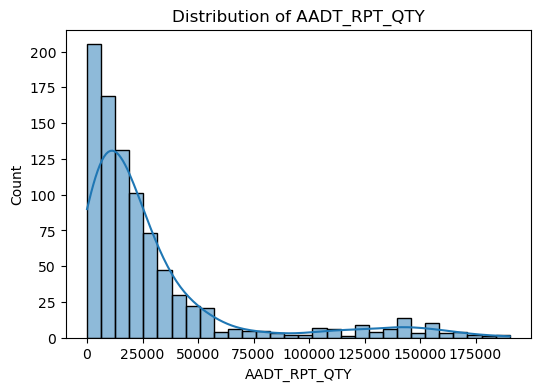

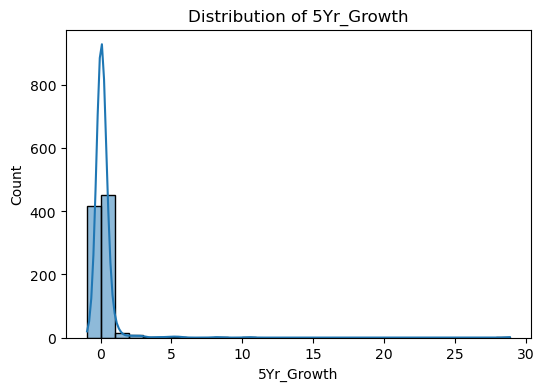

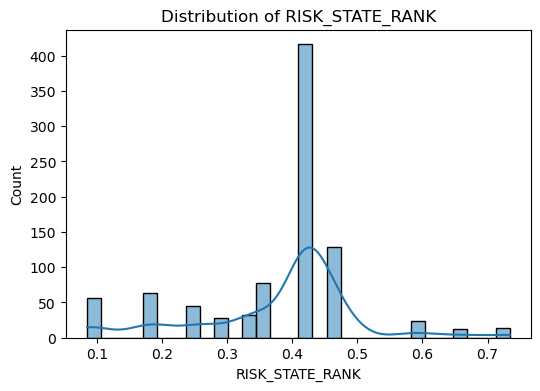

In [251]:
columns_to_check = ['AADT_RPT_QTY', '5Yr_Growth', 'RISK_STATE_RANK']
for col in columns_to_check:
    plot.figure(figsize=(6,4))
    sns.histplot(final[col], kde=True, bins=30)
    plot.title(f"Distribution of {col}")
    plot.show()


#### Winsorize the 5 year growth column (cap at 1st and 99th percentile)

In [256]:
final['5Yr_Growth'] = winsorize(final['5Yr_Growth'], limits=[0.01, 0.01])

### Use Min Max Scaling since not normally distributed

In [261]:
scaler = MinMaxScaler()

final[['AADT_RPT_QTY_Scaled', '5Yr_Growth_Scaled', 'RISK_STATE_RANK_Scaled']] = scaler.fit_transform(final[['AADT_RPT_QTY', '5Yr_Growth', 'RISK_STATE_RANK']])

In [263]:
final_scaled = final[['CNTY_NM', 'City', 'LATITUDE', 'LONGITUDE', 'Wildfire_Risk', 'RISK_STATE_RANK_Scaled', 'AADT_RPT_QTY_Scaled', '5Yr_Growth_Scaled']]

## Create Gridlock Risk Score

In [ ]:
final_scaled = pd.read_csv('../data/outputs/final_scaled.csv')
# Weights
current_traffic_wt = .3
traffic_growth_wt = .3
local_risk_wt = .2
city_risk_wt = .2
final_scaled['Gridlock_Risk_Score'] = (final_scaled['Wildfire_Risk']*local_risk_wt + 
final_scaled['RISK_STATE_RANK_Scaled']*city_risk_wt +
final_scaled['AADT_RPT_QTY_Scaled']*current_traffic_wt +
final_scaled['5Yr_Growth_Scaled']*traffic_growth_wt)


#### View Top Gridlock Risk Scores

In [296]:
final_scaled.sort_values(by='Gridlock_Risk_Score', ascending=False).head()

,CNTY_NM,City,LATITUDE,LONGITUDE,Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score
19,Hays,San Marcos,29.926113,-97.891120,1,0.402157,0.665763,0.181049,0.534475
18,Hays,Wimberley,30.004252,-98.082169,1,1.000000,0.040489,0.173912,0.464320
22,Hays,Wimberley,29.998712,-98.087238,1,1.000000,0.044611,0.166886,0.463449
23,Hays,Dripping Springs,30.206782,-97.977100,1,0.885978,0.168100,0.112298,0.461315
502,Travis,Austin,30.222832,-97.747646,0,0.519260,0.985742,0.191908,0.457147


In [294]:
final_scaled.describe()

,LATITUDE,LONGITUDE,Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,30.303717,-97.707248,0.012249,0.456055,0.150036,0.181519,0.193127
std,0.223706,0.186814,0.110059,0.191811,0.194774,0.126155,0.081171
min,29.800813,-98.220512,0.000000,0.000000,0.000000,0.000000,0.011452
25%,30.169847,-97.826522,0.000000,0.394068,0.037879,0.129286,0.145352
50%,30.323180,-97.717340,0.000000,0.519260,0.086111,0.157686,0.176872
75%,30.482913,-97.654950,0.000000,0.519260,0.162220,0.194145,0.221501
max,30.764470,-97.130525,1.000000,1.000000,1.000000,1.000000,0.534475


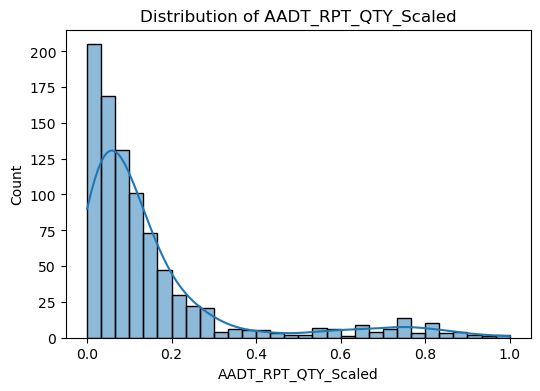

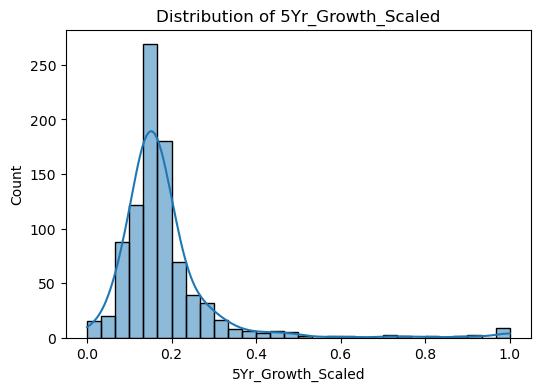

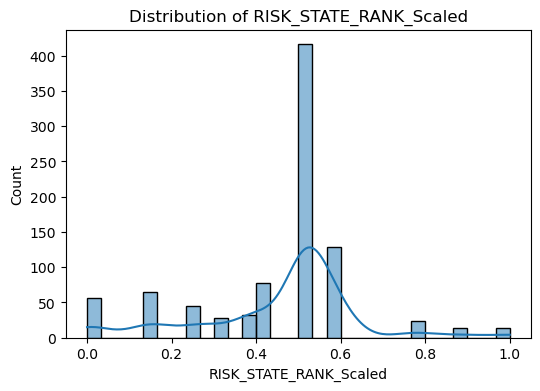

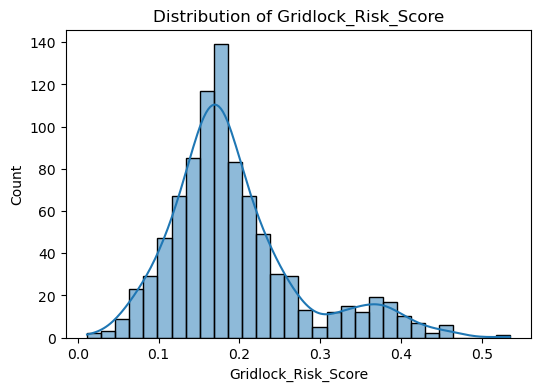

In [275]:
columns_to_check = ['AADT_RPT_QTY_Scaled', '5Yr_Growth_Scaled', 'RISK_STATE_RANK_Scaled', 
                   'Gridlock_Risk_Score']
for col in columns_to_check:
    plot.figure(figsize=(6,4))
    sns.histplot(final_scaled[col], kde=True, bins=30)
    plot.title(f"Distribution of {col}")
    plot.show()


In [ ]:
final_scaled.to_csv('../data/outputs/final_scaled.csv', index=False)

In [ ]:
final_scaled = pd.read_csv('../data/outputs/final_scaled.csv')

In [328]:
final_scaled.sort_values(by='Gridlock_Risk_Score', ascending=False)

,CNTY_NM,City,LATITUDE,LONGITUDE,Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score
19,Hays,San Marcos,29.926113,-97.891120,1,0.402157,0.665763,0.181049,0.534475
18,Hays,Wimberley,30.004252,-98.082169,1,1.000000,0.040489,0.173912,0.464320
22,Hays,Wimberley,29.998712,-98.087238,1,1.000000,0.044611,0.166886,0.463449
23,Hays,Dripping Springs,30.206782,-97.977100,1,0.885978,0.168100,0.112298,0.461315
502,Travis,Austin,30.222832,-97.747646,0,0.519260,0.985742,0.191908,0.457147
...,...,...,...,...,...,...,...,...,...
853,Williamson,Taylor,30.553045,-97.412668,0,0.000000,0.001386,0.149735,0.045336
850,Williamson,Taylor,30.564770,-97.408365,0,0.000000,0.010944,0.134764,0.043712
857,Williamson,Taylor,30.568082,-97.409302,0,0.000000,0.000378,0.115419,0.034739
806,Williamson,Taylor,30.553034,-97.396940,0,0.000000,0.000630,0.068790,0.020826
